<a href="https://colab.research.google.com/github/muhammadazad-IT23/Assignment-code-optimazatition/blob/main/Copy_of_salary2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# 2. Data Preprocessing
# Load the dataset using a data analysis library such as pandas

import pandas as pd

# Load the dataset
data = pd.read_csv('/content/salaries.csv')  # Update the path if necessary
print("Dataset Shape:", data.shape)  # Display the shape of the dataset
data.info()  # Display dataset information
print(data.describe())  # Display statistical summary
print("Missing Values in Each Column:")  # Display missing values
print(data.isnull().sum())

Dataset Shape: (16534, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB
          work_year        salary  salary_in_usd  remote_ratio
count  16534.000000  1.653400e+04   16534.000000  16534.000000
mean    2023.226866  1.637270e+05  149686.777973     32.003750
s

In [14]:
# The previous code already displays the structure and characteristics.


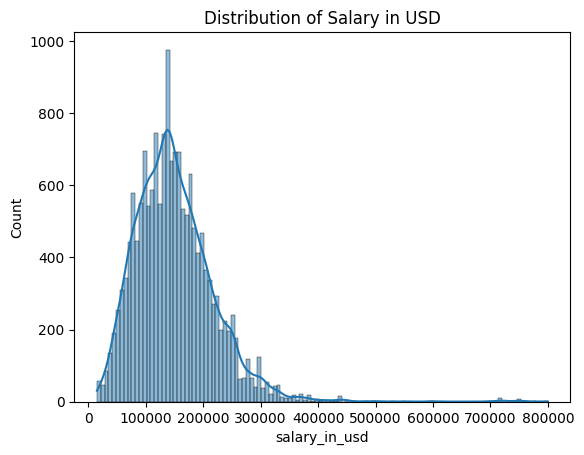

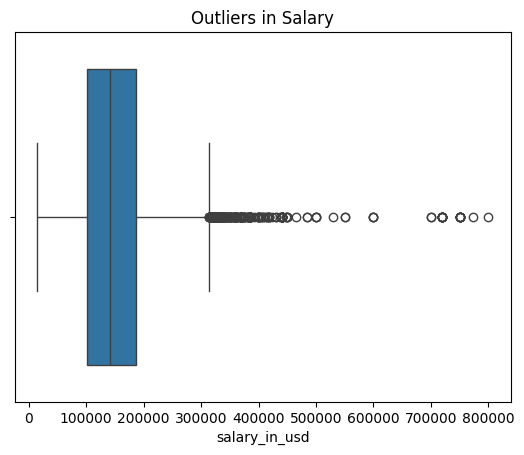

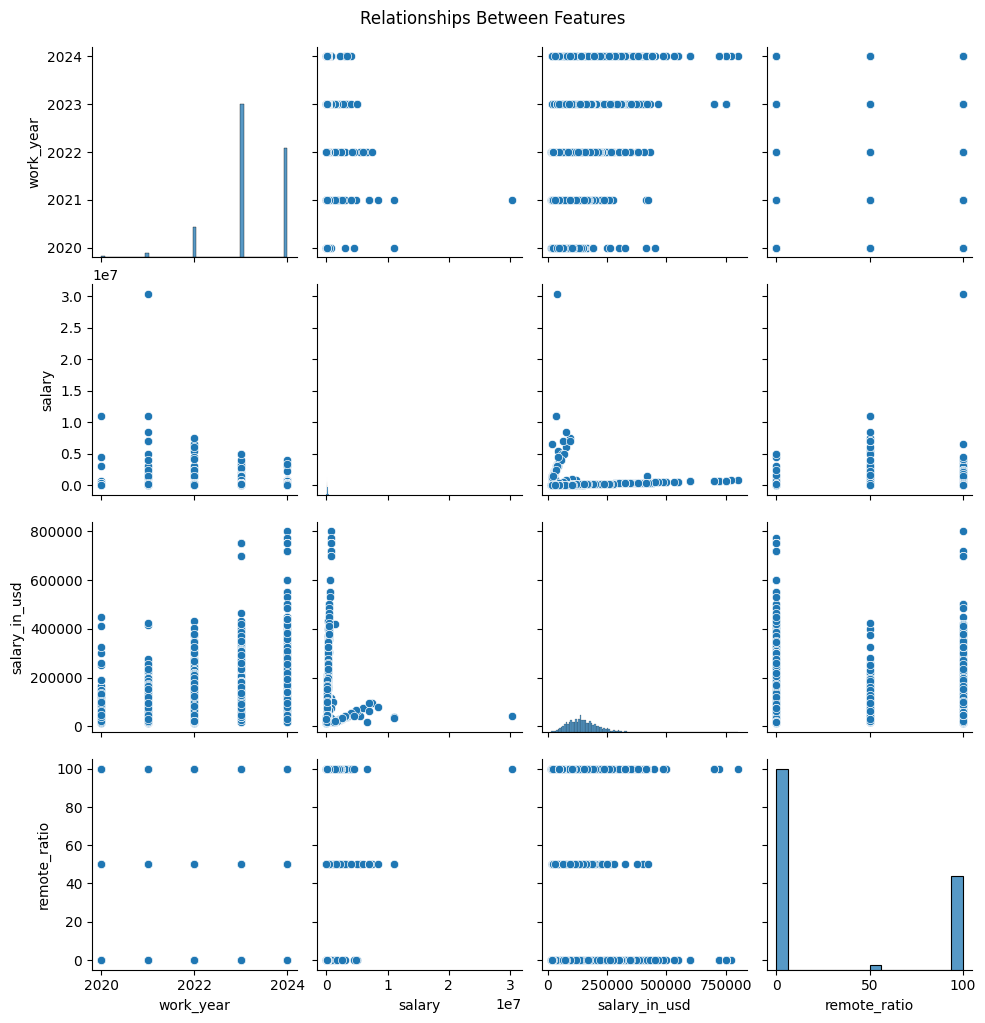

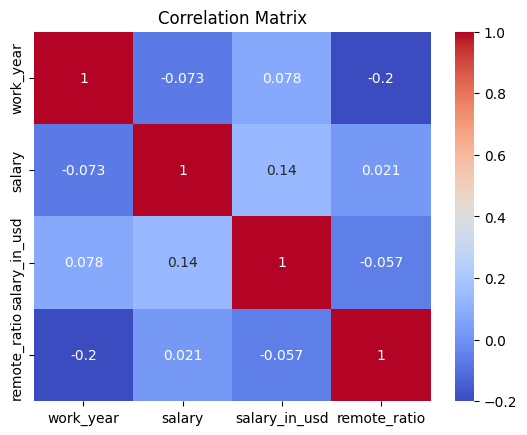

In [16]:
# Visualize the data distribution and relationships between features

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for distribution of 'salary_in_usd'
sns.histplot(data['salary_in_usd'], kde=True).set(title='Distribution of Salary in USD')
plt.show()

# Box plot to identify outliers in 'salary_in_usd'
sns.boxplot(x=data['salary_in_usd']).set(title='Outliers in Salary')
plt.show()

# Pair plot to visualize relationships between numerical features
sns.pairplot(data.select_dtypes(include=['float64', 'int64'])).fig.suptitle('Relationships Between Features', y=1.02)
plt.show()

# Correlation heatmap to analyze the correlation between numerical features
numerical_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm').set(title='Correlation Matrix')
plt.show()

In [17]:
# Handle missing values appropriately

# Check for missing values before handling
print("Missing Values Before Handling:")
print(data.isnull().sum())

# Impute missing numerical values with the mean
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Impute missing categorical values with the mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Check for missing values after handling
print("Missing Values After Handling:")
print(data.isnull().sum())

Missing Values Before Handling:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Missing Values After Handling:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [18]:
# Encode categorical variables if needed (e.g., using one-hot encoding)
# Encode categorical variables using one-hot encoding

data = pd.get_dummies(data)

In [19]:
# Normalize or scale the features to improve model performance

from sklearn.preprocessing import StandardScaler

# Normalize or scale the features
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [20]:
# Split the dataset into training and testing sets (e.g., 70% training, 30% testing)

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = scaled_data.drop('salary_in_usd', axis=1)
y = scaled_data['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (11573, 357)
Testing set shape: (4961, 357)


In [21]:
# 3. Model Training
# Import the SVM classifier from a machine learning library such as scikit-learn

from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [23]:
# Train the SVM model on the training data
# Explore different kernel functions (linear, polynomial, RBF) and hyperparameters (C, gamma) to optimize the model

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf']
}

# Initialize the GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

# Train the SVM model on the training data.
grid.fit(X_train, y_train)  # Fit the model

# Print the best parameters and estimator found by GridSearchCV
print("Best Parameters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)

# Evaluate the best model on the test set
print("Classification Report for Best Model:")
print(classification_report(y_test, grid.predict(X_test)))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=

ValueError: 
All the 240 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 201, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 745, in _validate_targets
    check_classification_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/multiclass.py", line 218, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'
